In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='serif')

In [2]:
import phoebe
import numpy as np

logger = phoebe.logger('warning')

# we'll set the random seed so that the noise model is reproducible
np.random.seed(123456789)

# Create fake "observations"

In [3]:
b = phoebe.default_binary()

In [4]:
b.add_dataset('lc', compute_times=phoebe.linspace(0,5,501))

<ParameterSet: 42 parameters | contexts: compute, figure, constraint, dataset>

In [5]:
b.run_compute()

<ParameterSet: 3 parameters | qualifiers: fluxes, comments, times>

In [6]:
times = b.get_value('times@model')
fluxes = b.get_value('fluxes@model') + np.random.normal(size=times.shape) * 0.07 + 0.2*np.sin(times)
sigmas = np.ones_like(fluxes) * 0.05

# Create a New System

In [7]:
b = phoebe.default_binary()

In [8]:
b.add_dataset('lc', times=times, fluxes=fluxes, sigmas=sigmas)

<ParameterSet: 42 parameters | contexts: compute, figure, constraint, dataset>

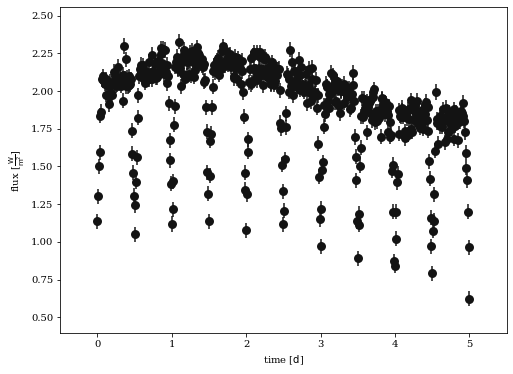

In [9]:
afig, mplfig = b.plot(show=True)

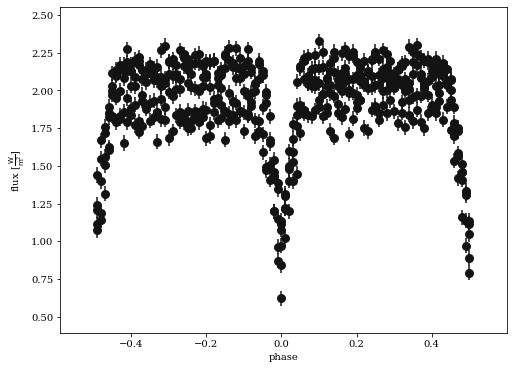

In [10]:
afig, mplfig = b.plot(x='phases', show=True)

In [11]:
b.run_compute(model='withoutGPs')

<ParameterSet: 3 parameters | qualifiers: fluxes, comments, times>

# Add GPs

See the API docs for [b.add_gaussian_process](../api/phoebe.frontend.bundle.Bundle.add_gaussian_process.md) and [gaussian_process](../api/phoebe.parameters.feature.gaussian_process.md).

In [12]:
b.add_gaussian_process(dataset='lc01', kernel='sho')

<ParameterSet: 8 parameters | contexts: compute, feature>

In [13]:
b.add_gaussian_process(dataset='lc01', kernel='matern32')

<ParameterSet: 8 parameters | contexts: compute, feature>

In [14]:
print(b.get_gaussian_process())

ParameterSet: 8 parameters
   kernel@gaussian_process01@f...: sho
   log_S0@gaussian_process01@f...: 0.0
   log_Q@gaussian_process01@fe...: 0.0
   log_omega0@gaussian_process...: 0.0
   kernel@gaussian_process02@f...: matern32
   log_sigma@gaussian_process0...: 0.0
   log_rho@gaussian_process02@...: 0.0
   eps@gaussian_process02@feature: 0.01


# Run Forward Model

Since the system itself is still time-independent, the model is computed for one cycle according to `compute_phases`, but is then interpolated at the phases of the times in the dataset to compute and expose the fluxes including gaussian processes at the dataset times.

If the model were time-dependent, then using `compute_times` or `compute_phases` without covering a sufficient time-span will raise an error.

In [15]:
print(b.run_checks_compute())

Run Checks Report: PASS



In [16]:
b.flip_constraint('compute_phases', solve_for='compute_times')
b.set_value('compute_phases', phoebe.linspace(0,1,101))

Thu, 21 May 2020 10:58 BUNDLE       WARNING underlying model will be computed at compute_times for lc01 but exposed at dataset times in order to include gaussian processes
Thu, 21 May 2020 10:58 BUNDLE       WARNING underlying model will be computed at compute_times for lc01 but exposed at dataset times in order to include gaussian processes


In [17]:
print(b.run_checks_compute())

Run Checks Report: WARNING


In [18]:
b.run_compute(model='withGPs')

Thu, 21 May 2020 10:58 BUNDLE       WARNING underlying model will be computed at compute_times for lc01 but exposed at dataset times in order to include gaussian processes
Thu, 21 May 2020 10:58 PARAMETERS   WARNING times=(0.0 -> 5.0) outside of interpolation limits (0.0 -> 1.0), attempting to interpolate at phases=(-0.4900000000000002 -> 0.5)
Thu, 21 May 2020 10:58 BUNDLE       WARNING model for dataset='lc01' resampled at dataset times when adding GPs


<ParameterSet: 5 parameters | qualifiers: fluxes_nogps, fluxes, times, gps, comments>

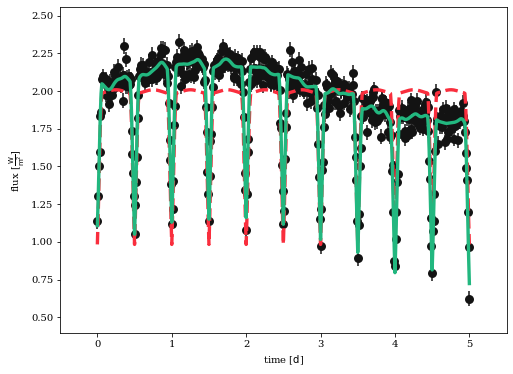

In [19]:
afig, mplfig = b.plot(c={'withoutGPs': 'red', 'withGPs': 'green'},
                      ls={'withoutGPs': 'dashed', 'withGPs': 'solid'},
                      s={'model': 0.03},
                      save='figure_GPs_times.eps', 
                      show=True)

Thu, 21 May 2020 10:58 PARAMETERS   WARNING defaulting to i='times' to plot in time-order because system is time_dependent.  Pass i='phases' to override.
Thu, 21 May 2020 10:58 PARAMETERS   WARNING defaulting to i='times' to plot in time-order because system is time_dependent.  Pass i='phases' to override.
Thu, 21 May 2020 10:58 PARAMETERS   WARNING defaulting to i='times' to plot in time-order because system is time_dependent.  Pass i='phases' to override.


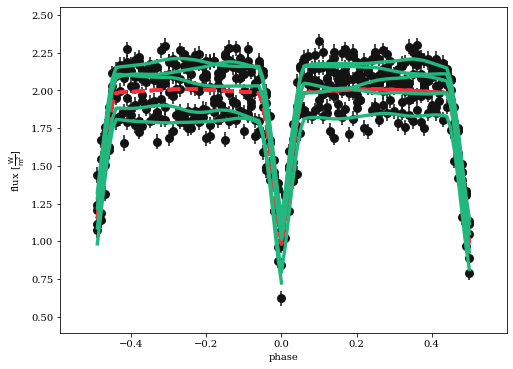

In [20]:
afig, mplfig = b.plot(c={'withoutGPs': 'red', 'withGPs': 'green'},
                      ls={'withoutGPs': 'dashed', 'withGPs': 'solid'},
                      s={'model': 0.03},
                      x='phases', 
                      save='figure_GPs_phases.eps', show=True)